## Monarch-KG notebook

In [5]:
from linkml_store.api.client import Client

client = Client()

In [6]:
from linkml_store.constants import LINKML_STORE_MODULE

MONARCH_KG_DB = "https://data.monarchinitiative.org/monarch-kg/latest/monarch-kg.db.gz"


path = LINKML_STORE_MODULE.ensure_gunzip(url=MONARCH_KG_DB, autoclean=True)


In [7]:
path

PosixPath('/Users/cjm/.data/linkml/store/monarch-kg.db')

In [11]:
database = client.attach_database(f"duckdb:///{path}", "monarch-kg")

In [14]:
edges_coll = database.get_collection("denormalized_edges")

In [15]:
qr = edges_coll.find()
qr.rows_dataframe

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,aggregator_knowledge_source,category,evidence,frequency_qualifier,has_evidence,id,knowledge_source,negated,object,object_category,...,qualifiers,relation,sex_qualifier,stage_qualifier,subject,subject_category,subject_closure,subject_closure_label,subject_label,subject_namespace
0,,,,,,urn:uuid:9d3db3b3-0e55-462f-9876-b125014e7a63,,,CHEBI:100147,biolink:MolecularEntity,...,,OBO:chebi,,,CHEBI:62070,biolink:MolecularEntity,CHEBI:35757|CHEBI:62070,monocarboxylic acid anion|nalidixic acid anion,nalidixic acid anion,CHEBI
1,,,,,,urn:uuid:fbc60452-f951-4f81-8dcf-bcc20834e7ab,,,CHEBI:100241,biolink:MolecularEntity,...,,OBO:chebi,,,CHEBI:192484,biolink:MolecularEntity,CHEBI:27369|CHEBI:192484,ciprofloxacin zwitterion|zwitterion,ciprofloxacin zwitterion,CHEBI
2,,,,,,urn:uuid:fe862fe6-0ae3-4f83-97ec-39f1d7683a87,,,CHEBI:100241,biolink:MolecularEntity,...,,OBO:chebi,,,CHEBI:192486,biolink:MolecularEntity,CHEBI:137419|CHEBI:192486,secondary ammonium ion|ciprofloxacin(1+),ciprofloxacin(1+),CHEBI
3,,,,,,urn:uuid:773f1b21-bf81-4208-ab59-448545ffe46b,Graph,,CHEBI:10545,biolink:ChemicalSubstance,...,,BFO:0000051,,,CHEBI:33250,biolink:ChemicalEntity,CHEBI:24431|CHEBI:33250,chemical entity|atom,atom,CHEBI
4,,,,,,urn:uuid:83584793-1852-4166-9723-24287c85f136,,,CHEBI:10642,biolink:MolecularEntity,...,,OBO:chebi,,,CHEBI:27405,biolink:MolecularEntity,CHEBI:24436|CHEBI:61689|CHEBI:27405,guanidines|streptidine|amino cyclitol,streptidine,CHEBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,,,,,,urn:uuid:2e2135d0-f67b-4f18-bf6d-363e2a70a42f,Graph,,CHEBI:133135,biolink:MolecularEntity,...,,rdfs:subClassOf,,,CHEBI:72579,biolink:MolecularEntity,CHEBI:133135|CHEBI:72579,chromenochromene|tetrahydrochromenochromene,tetrahydrochromenochromene,CHEBI
96,,,,,,urn:uuid:d93f9e52-2825-436b-91fb-97ea82d01a83,Graph,,CHEBI:133251,biolink:MolecularEntity,...,,rdfs:subClassOf,,,CHEBI:17325,biolink:MolecularEntity,CHEBI:133251|CHEBI:17325,3-hydroxydicarboxylate(2-)|3-hydroxy-3-methylg...,3-hydroxy-3-methylglutarate(2-),CHEBI
97,,,,,,urn:uuid:e1d4dc4d-3142-48cf-ba4d-1946638d61eb,Graph,,CHEBI:133291,biolink:MolecularEntity,...,,rdfs:subClassOf,,,CHEBI:15792,biolink:MolecularEntity,CHEBI:133291|CHEBI:15792,saturated dicarboxylic acid dianion(2-)|malona...,malonate(2-),CHEBI
98,,,,,,urn:uuid:341fe57a-f81c-4e50-83d7-c755e74f48a1,,,CHEBI:133294,biolink:MolecularEntity,...,,OBO:chebi,,,CHEBI:36145,biolink:MolecularEntity,CHEBI:35692|CHEBI:25754|CHEBI:36145,oxo carboxylic acid|dicarboxylic acid|oxo dica...,oxo dicarboxylic acid,CHEBI


In [19]:
key = ("subject_category", "object_category")
facets = edges_coll.query_facets(facet_columns=[key])

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def heatmap(data):
    
    # Convert data into a DataFrame
    df = pd.DataFrame(data, columns=['Source', 'Target', 'Value'])
    
    # Pivot the data to create a matrix suitable for a heatmap
    pivot_df = df.pivot(index='Source', columns='Target', values='Value').fillna(0)

    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_df, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Frequency'})
    plt.title("Heatmap of Biolink Data Frequencies")
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    plt.show()


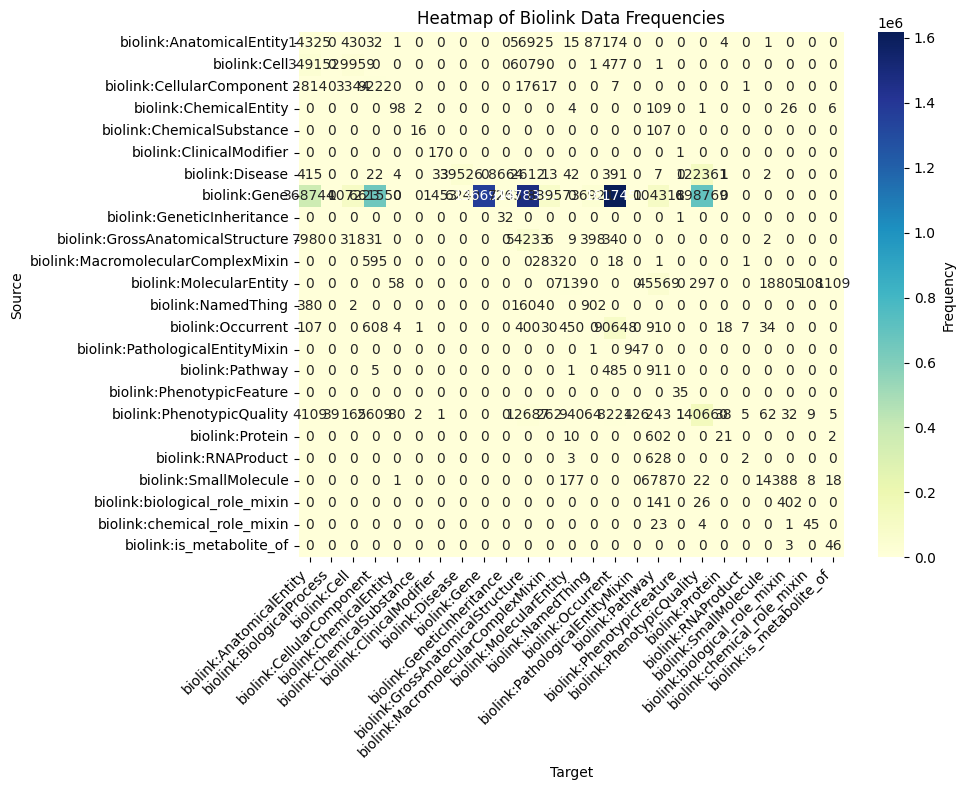

In [23]:
heatmap(facets[key])

In [24]:
database.list_collections()

[DuckDBCollection(name='dangling_edges', parent=DuckDBDatabase(handle='duckdb:////Users/cjm/.data/linkml/store/monarch-kg.db', _schema_view=None, _collections={'dangling_edges': ..., 'denormalized_edges': DuckDBCollection(name='denormalized_edges', parent=..., _indexes=None, _table_created=None), 'edges': DuckDBCollection(name='edges', parent=..., _indexes=None, _table_created=None), 'nodes': DuckDBCollection(name='nodes', parent=..., _indexes=None, _table_created=None)}, _connection=None, _engine=Engine(duckdb:////Users/cjm/.data/linkml/store/monarch-kg.db)), _indexes=None, _table_created=None),
 DuckDBCollection(name='denormalized_edges', parent=DuckDBDatabase(handle='duckdb:////Users/cjm/.data/linkml/store/monarch-kg.db', _schema_view=None, _collections={'dangling_edges': DuckDBCollection(name='dangling_edges', parent=..., _indexes=None, _table_created=None), 'denormalized_edges': ..., 'edges': DuckDBCollection(name='edges', parent=..., _indexes=None, _table_created=None), 'nodes': 